In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors 
realestate_sales = pd.read_csv("http://raptor.kent.ac.uk/~ds756/Data/kc_house_data_small.csv")

In [30]:
realestate_sales.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1423800210,20140923T000000,230000.0,3,1.00,1640,7187,1.0,0,0,...,7,1640,0,1966,0,98058,47.4550,-122.182,1340,8346
2,2125049131,20140729T000000,680000.0,3,1.75,1620,5500,1.0,0,0,...,7,1110,510,1950,0,98112,47.6393,-122.308,2100,6500
3,5318101765,20140602T000000,985000.0,3,1.75,1670,5400,2.0,0,0,...,8,1670,0,1912,0,98112,47.6350,-122.284,2100,5400
4,6624300110,20140623T000000,375000.0,4,2.50,1870,7471,2.0,0,0,...,8,1870,0,1990,0,98055,47.4314,-122.204,2020,8912


In [31]:
#Task 1
realestate_sales["unit_price"] = realestate_sales["price"] / realestate_sales["sqft_living"]
# price per sqr ft
# lecture 10

In [32]:
realestate_sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,unit_price
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,188.050847
1,1423800210,20140923T000000,230000.0,3,1.00,1640,7187,1.0,0,0,...,1640,0,1966,0,98058,47.4550,-122.182,1340,8346,140.243902
2,2125049131,20140729T000000,680000.0,3,1.75,1620,5500,1.0,0,0,...,1110,510,1950,0,98112,47.6393,-122.308,2100,6500,419.753086
3,5318101765,20140602T000000,985000.0,3,1.75,1670,5400,2.0,0,0,...,1670,0,1912,0,98112,47.6350,-122.284,2100,5400,589.820359
4,6624300110,20140623T000000,375000.0,4,2.50,1870,7471,2.0,0,0,...,1870,0,1990,0,98055,47.4314,-122.204,2020,8912,200.534759


In [33]:
#task 2
#avr price per sqr ft by zip code
subdf = realestate_sales.groupby("zipcode")["unit_price"].mean()
subdf.head()

zipcode
98001    155.791298
98002    152.284512
98003    158.400200
98004    481.385148
98005    294.317493
Name: unit_price, dtype: float64

In [34]:
#Task 3
avr_bed = realestate_sales.groupby("bedrooms")["price"].mean().reset_index()
avr_bed.head()


,bedrooms,price
0,0,295000.000000
1,1,354108.695652
2,2,422607.790123
3,3,473592.012670
4,4,662161.135690


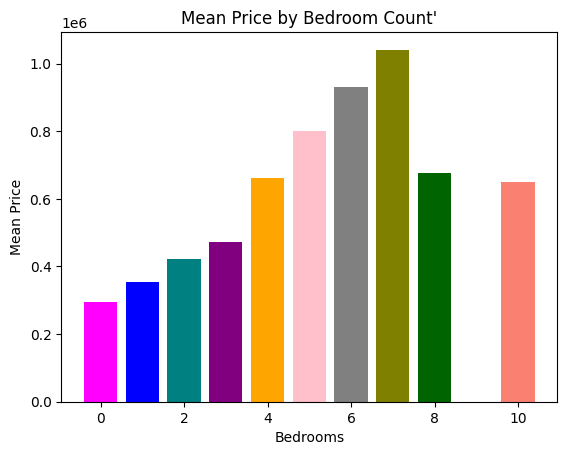

In [35]:
#task 4 -> either convert to df or use index
#https://matplotlib.org/stable/gallery/color/named_colors.html


#data
colors=['magenta', 'blue', 'teal', 'purple', 'orange', 'pink','gray','olive','darkgreen','salmon']
plt.bar(avr_bed["bedrooms"], avr_bed["price"], color=colors[:len(avr_bed)])


#design
plt.xlabel("Bedrooms")
plt.ylabel("Mean Price")
plt.title("Mean Price by Bedroom Count'")

plt.show()

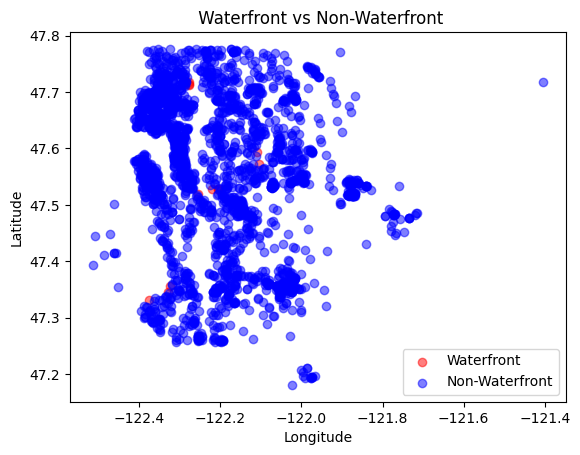

In [36]:
#Task 4
# waterfront plot and scatter
waterfront = realestate_sales[realestate_sales["waterfront"] == 1]
plt.scatter(waterfront["long"], waterfront["lat"], color='red', label='Waterfront', alpha=0.5)

#non waterfront plot and scatter
non_waterfront = realestate_sales[realestate_sales["waterfront"] == 0]
plt.scatter(non_waterfront["long"], non_waterfront["lat"], color='blue', label='Non-Waterfront', alpha=0.5)

#(alpha controls transparency)

# Assign axis
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(" Waterfront vs Non-Waterfront")

# displays the key(red vs blue) in bottom right
plt.legend(loc="lower right")



plt.show()


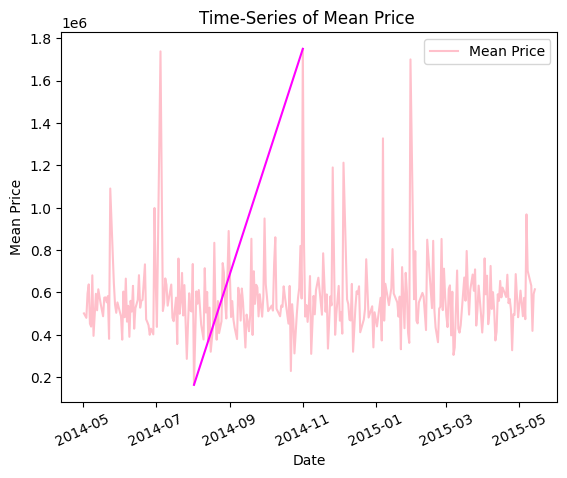

In [28]:
#Task 5
# Convert 'date' to datetime & set index
realestate_sales['date'] = pd.to_datetime(realestate_sales['date'])
realestate_sales = realestate_sales.set_index("date")
#realestate_sales.dtypes


# Group by date and calculate the mean price
ts_sales = realestate_sales.groupby("date")["price"].mean()

#create time-series data
plt.plot(ts_sales.index, ts_sales.values, label="Mean Price", color="pink")



#Design
plt.xlabel("Date")
plt.ylabel("Mean Price")
plt.title("Time-Series of Daily Mean Price ")
plt.legend()
plt.xticks(rotation=25)  
# Rotates date labels 


#overlay
min_price = ts_sales.min()
max_price = ts_sales.max()
min_date = ts_sales.idxmin()
max_date = ts_sales.idxmax()
plt.plot([min_date, max_date], [min_price, max_price], color="magenta", label="Min to Max Line")


plt.show()
